In this project I´ll implement sevral machine learning algorithms using Scikit-learn by using a simple dataset for the task of training a classifier to distinguish between different types of fruits.
 
The goal of the project was to learn and gain experience in machine learning.The objective is to identify the machine learning algorithm that is best-suited for the problem at hand (fruit clasification) thus, we want to compare different algorithms, selecting the best-performing one.
 

In [31]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
file_path = r"C:\Users\perez\Documents\FruitData\fruit_data_with_colors.txt"
fruits = pd.read_table(file_path)
fruits.head()
print(fruits.shape)


(59, 7)


In [32]:
from IPython.display import display

display(fruits)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


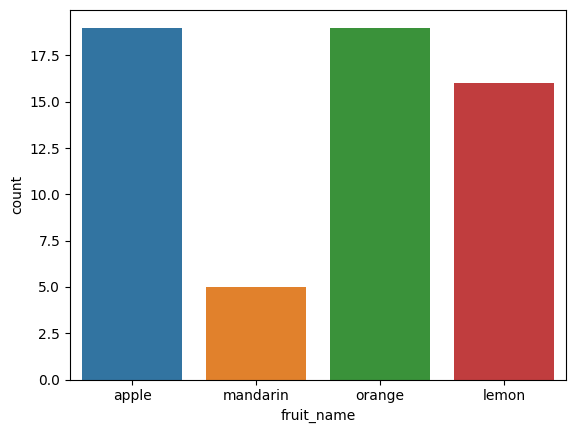

In [33]:
# Creating a count plot is relvant to visualize the distribution of the fruit type, which is useful to identify data imbalance or
# help on model selection.Among other things.
import seaborn as sns
# Create a count plot using Seaborn.
# The 'data' parameter specifies the dataset to be used, which is the 'fruits' DataFrame in this case.
# The 'x' parameter specifies the column to be plotted on the x-axis, which is the 'fruit_name' column in this case.
# The 'label' parameter can be used to set the label for the plot. In this case, it's not necessary and can be omitted.
sns.countplot(data=fruits, x='fruit_name', label="Count")
# Display the plot using Matplotlib.
plt.show()

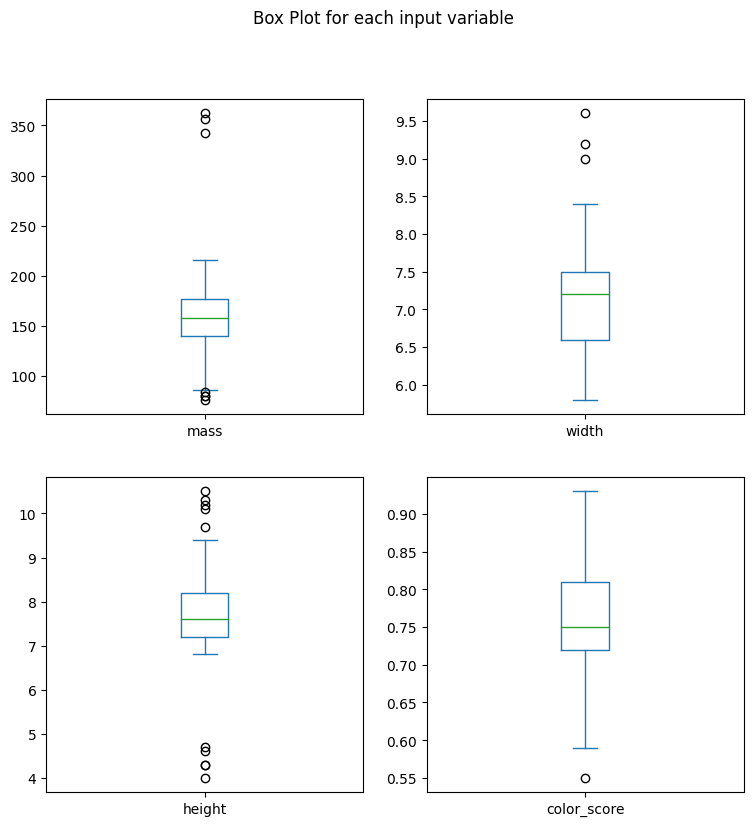

In [34]:
# The following code is used to create a box plot for each input variable in the 'fruits' dataset.

# A box plot helps with feature selection.Identify features that exhibit significant variability among different fruit types. 
# Features with low variance might not be as informative, while features with high variance can be more discriminatory.
# Creating a box plot helps with data exploration and preprocessing and Detecting Outliers (amomg others)

fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')

# First, drop (remove) the 'fruit_label' column from the 'fruits' DataFrame since it is not necessary for this visualization.
# The 'axis=1' parameter indicates that we want to drop the specified columns along the columns axis.
# The 'plot' function with 'kind='box'' creates the box plot for the remaining columns (input variables).
# The 'subplots=True' parameter indicates that we want to create separate subplots for each variable.
# The 'layout=(2, 2)' parameter specifies the arrangement of the subplots in a 2x2 grid (2 rows and 2 columns).
# The 'sharex=False' and 'sharey=False' parameters ensure that the x-axis and y-axis are not shared among subplots.
# The 'figsize=(9, 9)' parameter sets the size of the overall figure (width, height) in inches.

# Save the plot as an image file named 'fruits_box' in the current working directory.
plt.savefig('fruits_box')

# Display the box plot on the screen.
plt.show()


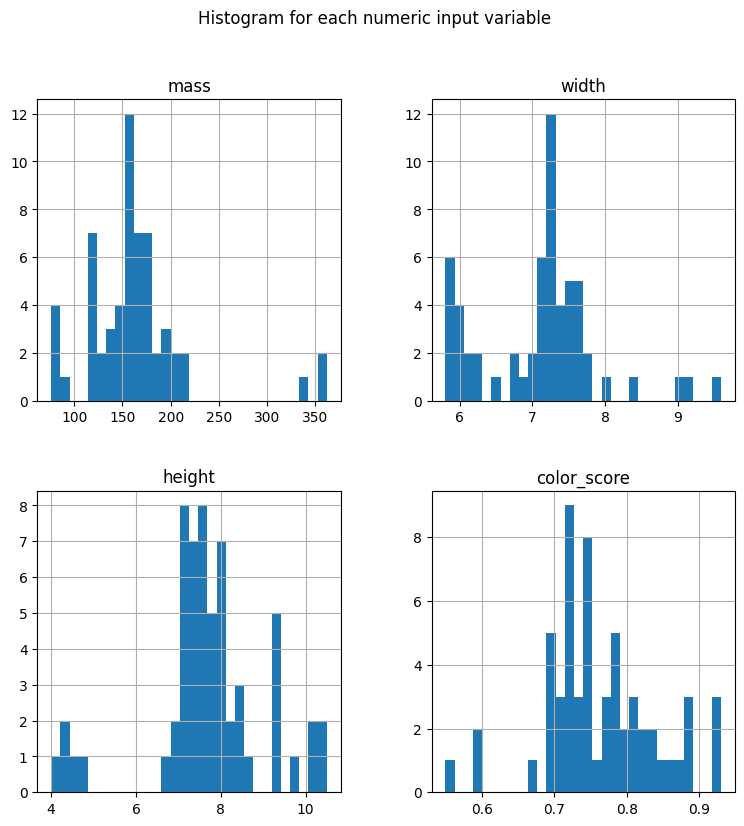

In [35]:
# The histograms provide insights into the range and frequency of values within each input variable,
# helping to understand the data distribution before building a machine learning mode.
# It also helps with identifying data patterns, data skweness, feature selection and overall understand the distribiution.

import pylab as pl
# Drop the 'fruit_label' column from the 'fruits' DataFrame since it is not necessary for this visualization.
# The 'axis=1' parameter indicates that we want to drop the specified columns along the columns axis.
fruits.drop('fruit_label', axis=1).hist(bins=30, figsize=(9, 9))

# Create histograms for each numeric input variable.
# The 'hist' function generates the histograms for the DataFrame columns after dropping 'fruit_label'.
# The 'bins=30' parameter sets the number of bins (intervals) used to display the histogram. It divides the data into 30 bins.
# The 'figsize=(9, 9)' parameter sets the size of the overall figure (width, height) in inches.

# Set the overall title for the combined histograms.
pl.suptitle("Histogram for each numeric input variable")

# Save the combined histogram plot as an image file named 'fruits_hist' in the current working directory.
plt.savefig('fruits_hist')

# Display the histogram plot on the screen.
plt.show()


Scatter Plot Interpretation:

Correlation: Observe the direction of the dots in the scatter plot. If the points generally form an upward trend, it suggests a positive correlation between the variables. If the points form a downward trend, it indicates a negative correlation. A horizontal pattern indicates little or no correlation.

Linearity: Check if the points in the scatter plot cluster around a straight line. This indicates a linear relationship between the variables. Non-linear patterns suggest non-linear relationships. Outliers: Look for data points that deviate significantly from the overall pattern in the scatter plot. Outliers can indicate anomalies or errors in the data.

Color Coding: In some cases, scatter matrices use color coding to represent additional information, such as class labels or categorical variables. Different colors in the scatter plots can indicate different groups or classes of data. This helps identify patterns or clusters in the data based on these categorical variables.

Correlation Strength: The overall distribution and alignment of the points in the scatter plots can provide insights into the strength of the correlation between variables. Strong correlations are indicated by tightly clustered points forming distinct trends, while weak correlations show scattered points with no clear trend.

Multicollinearity: When analyzing the scatter plots, watch for high correlations between pairs of features. High correlations can indicate multicollinearity, where two or more features are strongly correlated, leading to redundancy in the data.

array([[<Axes: xlabel='mass', ylabel='mass'>,
        <Axes: xlabel='width', ylabel='mass'>,
        <Axes: xlabel='height', ylabel='mass'>,
        <Axes: xlabel='color_score', ylabel='mass'>],
       [<Axes: xlabel='mass', ylabel='width'>,
        <Axes: xlabel='width', ylabel='width'>,
        <Axes: xlabel='height', ylabel='width'>,
        <Axes: xlabel='color_score', ylabel='width'>],
       [<Axes: xlabel='mass', ylabel='height'>,
        <Axes: xlabel='width', ylabel='height'>,
        <Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='color_score', ylabel='height'>],
       [<Axes: xlabel='mass', ylabel='color_score'>,
        <Axes: xlabel='width', ylabel='color_score'>,
        <Axes: xlabel='height', ylabel='color_score'>,
        <Axes: xlabel='color_score', ylabel='color_score'>]], dtype=object)

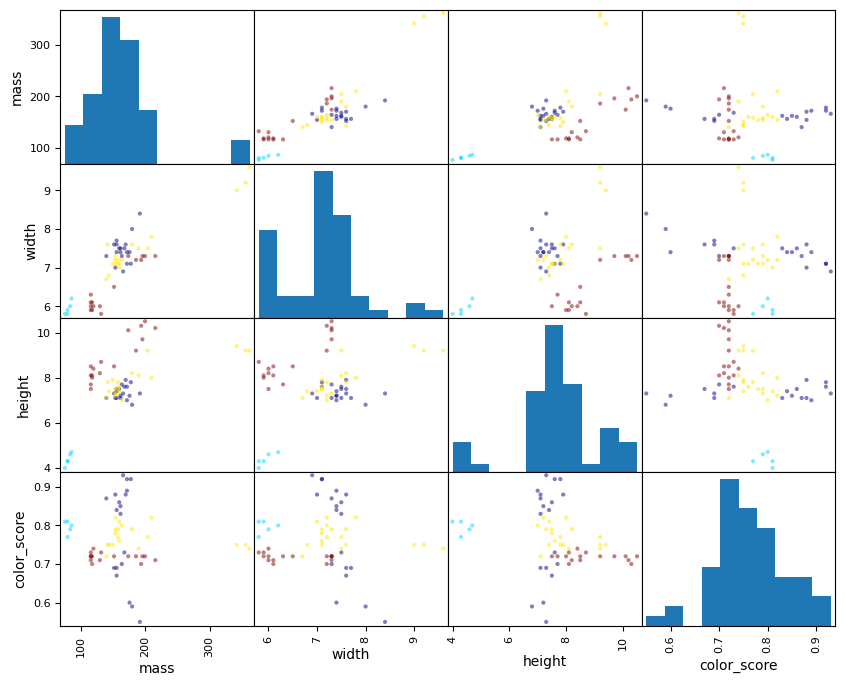

In [36]:
# A scatter matrix is a grid of scatter plots that visualizes the pairwise relationships between multiple variables in a dataset
# Diagonal Plots: these histograms show how the data is distributed along each specific feature.
# Off-Diagonal Plots: contain scatter plots that show the relationship between pairs of features.
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
feature_names = ['mass', 'width', 'height', 'color_score']
# scatter matrix for the specified features
scatter_matrix(fruits[feature_names], figsize=(10, 8), c=fruits['fruit_label'], cmap='jet')
#Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Specify the feature columns (input variables)
feature_columns = ['mass', 'width', 'height', 'color_score']

# Extract the feature data (X) and target data (y) from the 'fruits' DataFrame
X = fruits[feature_columns]

# Specify the target column (output variable)
feature_rows = ['fruit_label']
y = fruits[feature_rows]

# Flatten the target data to a 1D array using numpy's ravel() function to avoid any future error.
y = np.ravel(y)

# Split the data into training and testing sets
# The random_state parameter is set to 0 to ensure reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a MinMaxScaler object to scale the features between 0 and 1
scaler = MinMaxScaler()

# Scale the training data (X_train) using the fit_transform() method of the scaler
X_train = scaler.fit_transform(X_train)

# Scale the testing data (X_test) using the transform() method of the scaler
X_test = scaler.transform(X_test)


In [38]:
# This is a binary clasification algorithm which measures how many times the model made correct predictions.
from sklearn.linear_model import LogisticRegression
# Create an instance of the LogisticRegression classifier
logreg = LogisticRegression()
# Train the logistic regression model using the training data
logreg.fit(X_train, y_train)

# Print the accuracy of the logistic regression classifier on the training set
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
# Print the accuracy of the logistic regression classifier on the test set
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


In [39]:
# Helps to know the model performance.
from sklearn.tree import DecisionTreeClassifier
# Create a DecisionTreeClassifier instance and train it using the training data
clf = DecisionTreeClassifier().fit(X_train, y_train)
# Print the accuracy of the decision tree classifier on the training set
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
# Print the accuracy of the decision tree classifier on the test set
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


In [40]:
# Helps understand the model preformance.
from sklearn.neighbors import KNeighborsClassifier
# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier()
# Train the K-NN classifier using the training dat a
knn.fit(X_train, y_train)
# Print the accuracy of the K-NN classifier on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
# Print the accuracy of the K-NN classifier on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create a LinearDiscriminantAnalysis instance
lda = LinearDiscriminantAnalysis()
# Train the LDA classifier using the training data
lda.fit(X_train, y_train)
# Print the accuracy of the LDA classifier on the training set
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
# Print the accuracy of the LDA classifier on the test set
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X_test, y_test)))


Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


In [42]:
from sklearn.naive_bayes import GaussianNB
# Create a GaussianNB instance
gnb = GaussianNB()
# Train the GNB classifier using the training data
gnb.fit(X_train, y_train)
# Print the accuracy of the GNB classifier on the training set
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
# Print the accuracy of the GNB classifier on the test set
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))


Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


In [43]:
from sklearn.svm import SVC
# Create an SVC instance
svm = SVC()
# Train the SVM classifier using the training data
svm.fit(X_train, y_train)
# Print the accuracy of the SVM classifier on the training set
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
# Print the accuracy of the SVM classifier on the test set
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions using the K-NN classifier on the test set
pred = knn.predict(X_test)
# Print the confusion matrix
print(confusion_matrix(y_test, pred))
# Print the classification report
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



Among the various classification models we experimented with, the K-Nearest Neighbors (KNN) algorithm demonstrated the highest accuracy on our test data. The confusion matrix, revealed that the KNN model made no errors on the test set. It is essential to note that the test set used for evaluation was relatively small, which implies that we should interpret these results with caution and consider testing the model on a larger and more diverse dataset to ensure its generalizability to real-world scenarios.